# TSF GRIP - Data Science and Buisness Analytics Internship
## Task 1 - Prediction using Supervised Machine Learning
In this task we have to predict the percentage of an student based on the no. of study hours
### Submitted By - Moulik Shah

## STEP 1 - Importing the dataset
In this step we will import the dataset through the link with pandas library and then we will observe the data

In [89]:
# Importing all the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
from sklearn import metrics 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error
import warnings as wg 
wg.filterwarnings("ignore")

In [90]:
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)

In [91]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [85]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [87]:
# To find more information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [10]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [86]:
# To find the number of columns and rows
df.shape

(25, 2)

In [94]:
# To check if our dataset contains null or missing Values
df.isna().any()

Hours     False
Scores    False
dtype: bool

## STEP 2 - Visualizing The Dataset

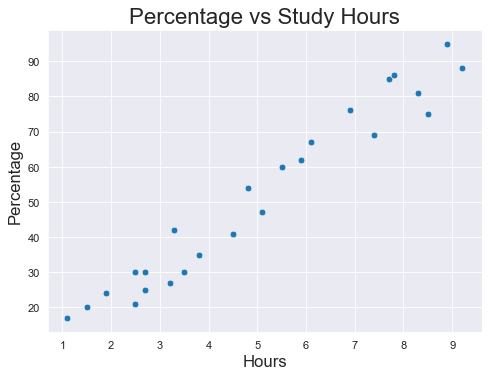

In [92]:
# Plotting our dataset 
plt.figure(figsize = (7,5),dpi = 80)
sns.set_style('darkgrid')
sns.scatterplot(y = df.Scores, x = df.Hours)
plt.title('Percentage vs Study Hours', size = 20)
plt.xlabel('Hours',size = 15)
plt.ylabel('Percentage', size = 15)
plt.show()

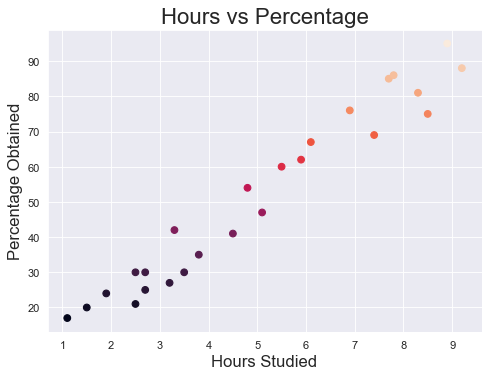

In [59]:
plt.figure(figsize = (7,5),dpi = 80)
sns.set_style('darkgrid')
plt.scatter(x = df.iloc[:,:-1].values, y = df.Scores.values, c=y)
plt.title('Hours vs Percentage', size = 20)
plt.xlabel('Hours Studied',size = 15)
plt.ylabel('Percentage Obtained', size = 15)
plt.show()

In [93]:
# To determine the correlation
df.corr(method = 'pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [28]:
df.corr(method = 'kendall')

,Hours,Scores
Hours,1.000000,0.884035
Scores,0.884035,1.000000


In [99]:
df.corr(method = 'spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


## STEP 3 - Linear Regression Model

In [ ]:
# Now let's divide the data
X = df.iloc[:,:-1].values
Y  = df.iloc[:,-1:].values

In [100]:
# To find the type of data
type(X), type(Y)

(numpy.ndarray, numpy.ndarray)

### Model Assignment

In [101]:
model = LinearRegression()

### Train test Split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)

In [102]:
model.fit(X_train,y_train)

LinearRegression()

#### Our model is trained

## STEP 4 - Visualizing our model

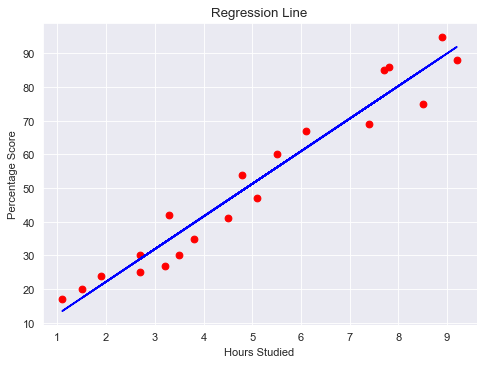

In [53]:
line = model.coef_*X + model.intercept_
plt.figure(figsize = (7,5),dpi = 80)
plt.scatter(X_train,y_train, color = 'red')
plt.plot(X, line, color = 'blue');
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.title('Regression Line for training data')
plt.show()

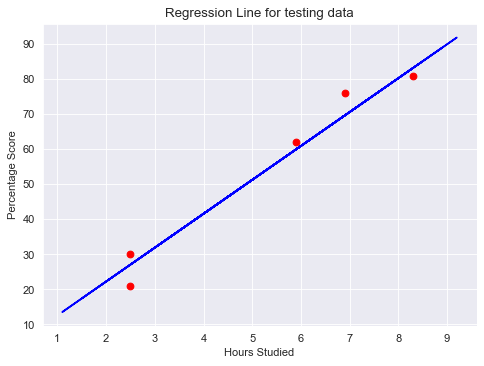

In [103]:
plt.figure(figsize = (7,5),dpi = 80)
plt.scatter(X_test,y_test, color = 'red')
plt.plot(X, line, color = 'blue');
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.title('Regression Line for testing data')
plt.show()

## Step 5 - Predictions of Scores

In [63]:
y_pred = model.predict(X_test)

In [64]:
print(X_test)

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [65]:
print(y_test)

[[81]
 [30]
 [21]
 [76]
 [62]]


In [66]:
y_pred

array([[83.18814104],
       [27.03208774],
       [27.03208774],
       [69.63323162],
       [59.95115347]])

In [71]:
print("Type: ", type(y_test),type(y_pred))
print("Shape: ", y_test.shape,y_pred.shape)
print("Dimensions: ",y_test.ndim,y_pred.ndim)

Type:  <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Shape:  (5, 1) (5, 1)
Dimensions:  2 2


In [72]:
df2 = pd.DataFrame.from_records({"Hours": X_test.reshape(len(X_test)),"Actual Score":y_test.reshape(len(y_test))})

In [73]:
df2

,Actual Score,Hours
0,81,8.3
1,30,2.5
2,21,2.5
3,76,6.9
4,62,5.9


In [74]:
df3 = pd.DataFrame.from_records({"Hours":X_test.reshape(len(X_test)),"Predicted Score":y_pred.reshape(len(y_pred))})

In [75]:
df3

,Hours,Predicted Score
0,8.3,83.188141
1,2.5,27.032088
2,2.5,27.032088
3,6.9,69.633232
4,5.9,59.951153


In [77]:
df4 = pd.DataFrame.from_records({"actual score":y_test.reshape(len(y_test)),"predicted score": y_pred.reshape(len(y_pred))},index=list(range(len(y_test))))

In [104]:
df4

,actual score,predicted score
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


## STEP 6 - Evaluating our model

In [105]:
print('Mean Absolute Error :',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Square Error :',metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Square Error :',math.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error : 3.9207511902099244
Mean Square Error : 18.943211722315272
Root Mean Square Error : 4.352380006653288


## STEP 7 - What will be the predicted score of a student if he/she studies for 9.25 hr/day?

In [82]:
hours = 9.25
own_pred = model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = [92.38611528]
